<a href="https://www.kaggle.com/code/kahokaya/fast-food-marketing-campaign-a-b-test?scriptVersionId=123585864" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
data=pd.read_csv("/kaggle/input/fast-food-marketing-campaign-ab-test/WA_Marketing-Campaign.csv")
print(data)

     MarketID MarketSize  LocationID  AgeOfStore  Promotion  week  \
0           1     Medium           1           4          3     1   
1           1     Medium           1           4          3     2   
2           1     Medium           1           4          3     3   
3           1     Medium           1           4          3     4   
4           1     Medium           2           5          2     1   
..        ...        ...         ...         ...        ...   ...   
543        10      Large         919           2          1     4   
544        10      Large         920          14          2     1   
545        10      Large         920          14          2     2   
546        10      Large         920          14          2     3   
547        10      Large         920          14          2     4   

     SalesInThousands  
0               33.73  
1               35.67  
2               29.03  
3               39.25  
4               27.81  
..                ...  
543

In [2]:
print(data.head(30))

    MarketID MarketSize  LocationID  AgeOfStore  Promotion  week  \
0          1     Medium           1           4          3     1   
1          1     Medium           1           4          3     2   
2          1     Medium           1           4          3     3   
3          1     Medium           1           4          3     4   
4          1     Medium           2           5          2     1   
5          1     Medium           2           5          2     2   
6          1     Medium           2           5          2     3   
7          1     Medium           2           5          2     4   
8          1     Medium           3          12          1     1   
9          1     Medium           3          12          1     2   
10         1     Medium           3          12          1     3   
11         1     Medium           3          12          1     4   
12         1     Medium           4           1          2     1   
13         1     Medium           4           1 

In [3]:
print(data.tail())

     MarketID MarketSize  LocationID  AgeOfStore  Promotion  week  \
543        10      Large         919           2          1     4   
544        10      Large         920          14          2     1   
545        10      Large         920          14          2     2   
546        10      Large         920          14          2     3   
547        10      Large         920          14          2     4   

     SalesInThousands  
543             64.34  
544             50.20  
545             45.75  
546             44.29  
547             49.41  


In [4]:
print(data.columns)
print("--"*100)
print(data.info())
print("--"*100)
print(data.describe().T)

Index(['MarketID', 'MarketSize', 'LocationID', 'AgeOfStore', 'Promotion',
       'week', 'SalesInThousands'],
      dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB
None
------------------------------------------------------------------------

<AxesSubplot:>

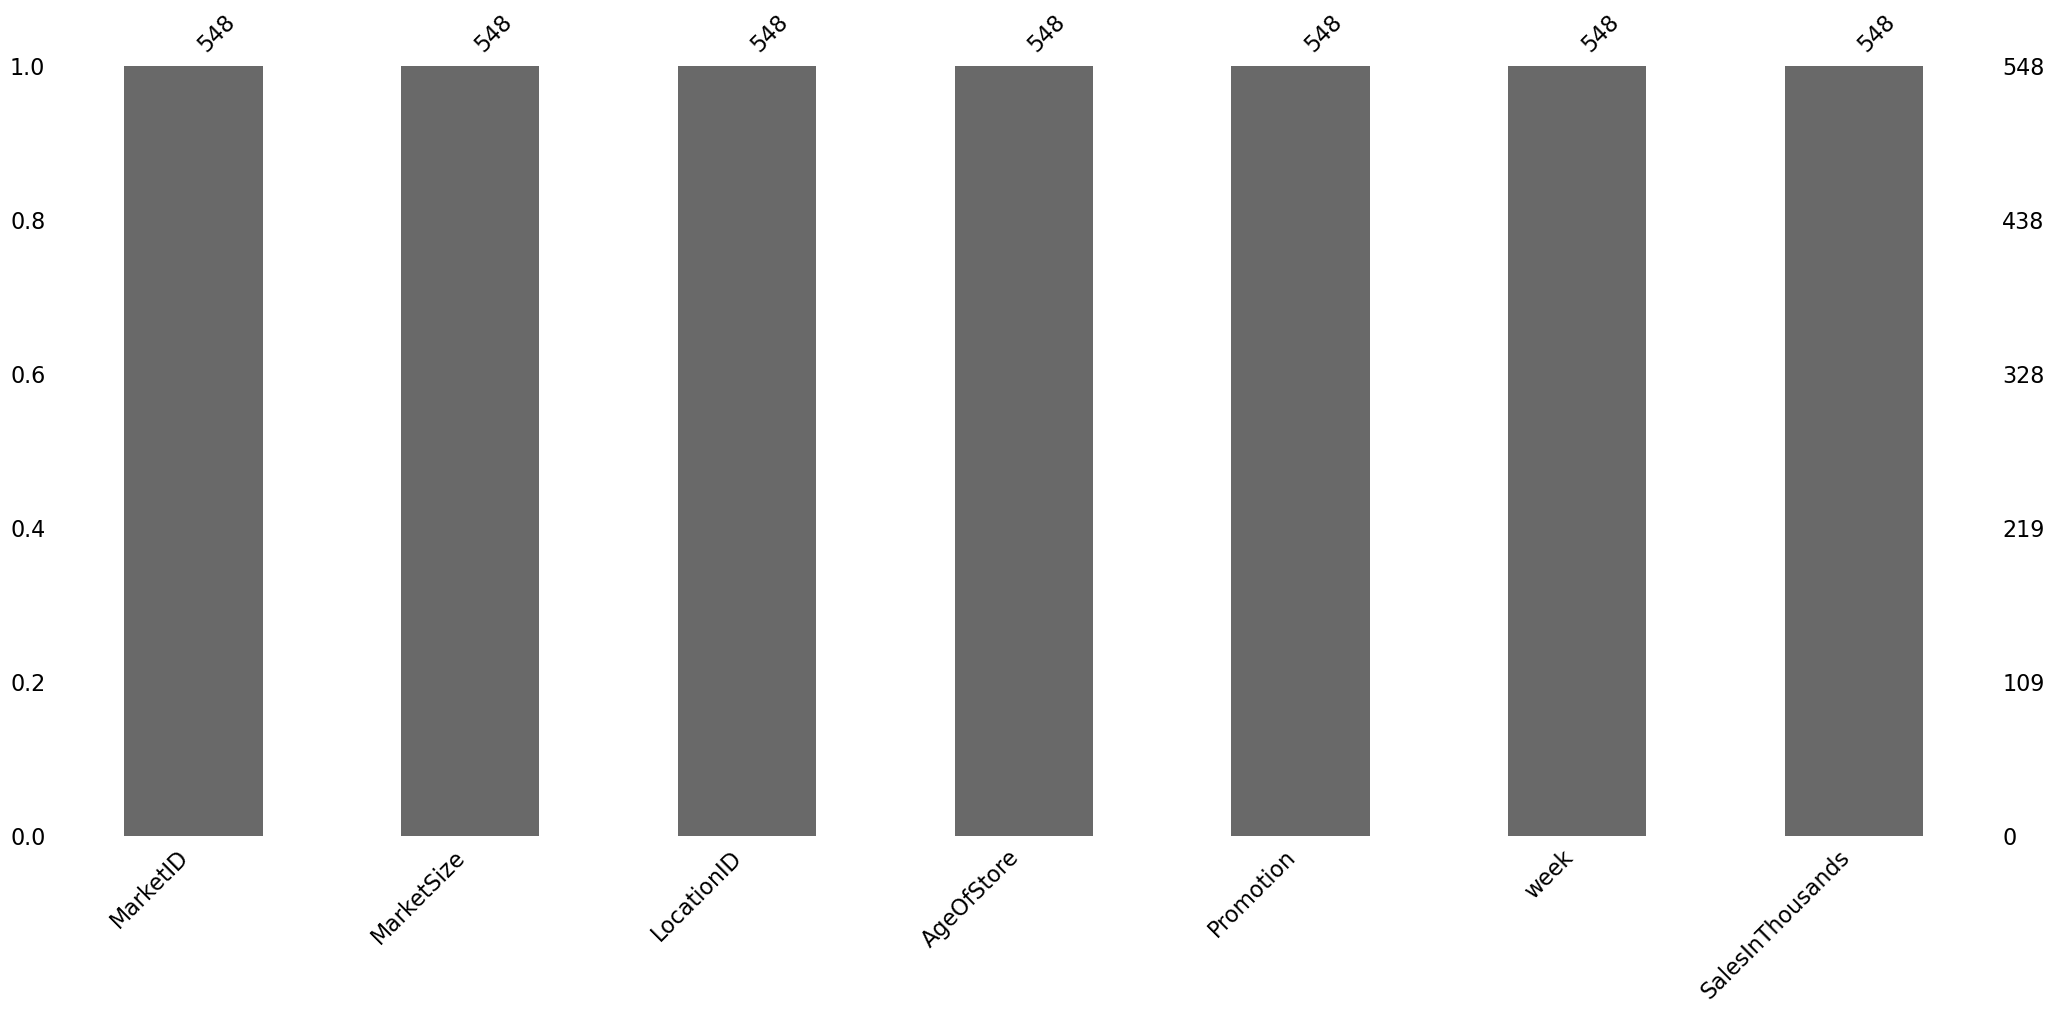

In [5]:
import missingno as msno
msno.bar(data)

<AxesSubplot:xlabel='Promotion', ylabel='SalesInThousands'>

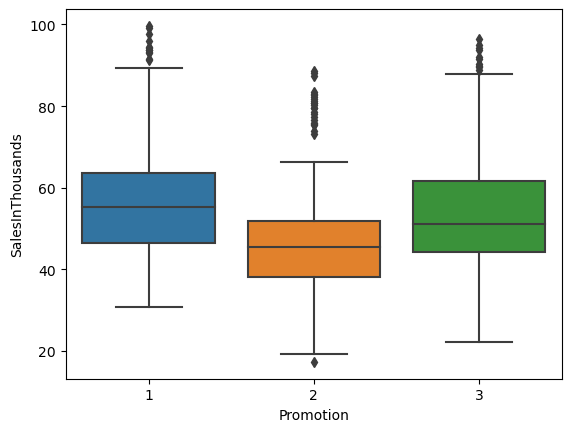

In [6]:
import seaborn as sns
sns.boxplot(data=data,x="Promotion",y="SalesInThousands")
# BAKTIGIMIZ BU SONUCLARIN ŞANSA BAĞLI OLUP OLMADIGINI OGRENMEK ICIN İSTATİSTİK TESTLER UYGULANMALIDIR.

In [7]:
data.groupby("Promotion").count().T
#her bırınden alınan orneklem sayısı ortalama aynı. bu sonucun dogru olması ıcın onemlı dır.

Promotion,1,2,3
MarketID,172,188,188
MarketSize,172,188,188
LocationID,172,188,188
AgeOfStore,172,188,188
week,172,188,188
SalesInThousands,172,188,188


In [8]:
data.groupby("Promotion").mean().T

Promotion,1,2,3
MarketID,5.790698,5.893617,5.468085
LocationID,488.465116,497.446809,453.808511
AgeOfStore,8.279070,7.978723,9.234043
week,2.500000,2.500000,2.500000
SalesInThousands,58.099012,47.329415,55.364468


In [9]:
# 1.ADIM: normallik testi
from scipy import stats
for m in range(3):
  gr=stats.shapiro(data[data["Promotion"]==m+1]["SalesInThousands"])
  print(gr)
#tum promosyon ceşitleri normallık testını gecmedi. tum p-value degerlerı 0.05 ten kucuk bu yuzden h0 red edilir.  

ShapiroResult(statistic=0.9152998328208923, pvalue=1.977244323825289e-08)
ShapiroResult(statistic=0.9145088791847229, pvalue=5.456262108793908e-09)
ShapiroResult(statistic=0.9207685589790344, pvalue=1.499518376135711e-08)


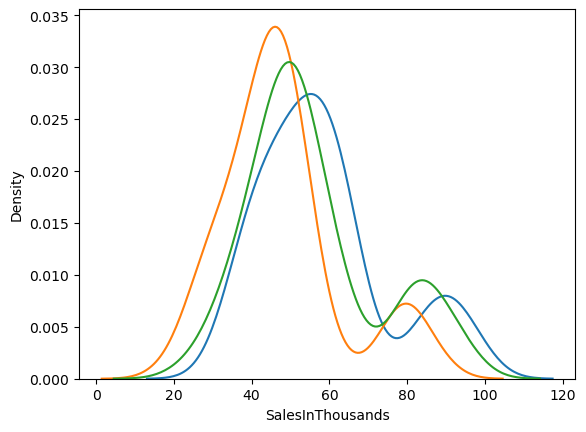

In [10]:
import seaborn as sns
for m in range(3):
  gr=data[data["Promotion"]==m+1]["SalesInThousands"]
  sns.kdeplot(gr)

#grafikten de anlaşılacağı üzere normal dağılım göstermemiş.  

In [11]:
# 2.ADIM: VARYANS HOMOJENLIGI TESTI
#şimdi sonra ki adım olan varyans homojenliğine geçelim.
#normal dağılım göstermediği için levene testi kullanılır.

stats.levene(data[data["Promotion"]==1]["SalesInThousands"],data[data["Promotion"]==2]["SalesInThousands"],data[data["Promotion"]==3]["SalesInThousands"])

#demek ki bunlar homojen dağılım gostermıs cunku h0 red edilmez. 
#homojen oldugu ıcın de parametrık test olan ANOVA ya gecılır.

LeveneResult(statistic=1.2696787527507418, pvalue=0.2817514565692118)

In [12]:
# 3.ADIM:ANOVA
#VERİMİZDE TEK BIR BAGIMLI DEGISKEN VE BIRDEN FAZLA BAGIMSIZ KATEGORIK DEGISKENIMIZ VAR VE DE HER BIRI EN AZ 3 GRUPTAN OLUSTUGU ICIN CIFT YONLU ANOVA UYGULANILIR.
#İKİ YÖNLÜ ANOVA:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model="SalesInThousands ~ C(Promotion)+C(MarketSize):C(Promotion)+C(MarketSize)"
test=ols(model,data=data,).fit()
anova=sm.stats.anova_lm(test,type=2)
print(anova)
#tum PR degerlerı h0 ı red eder yanı aralarında anlamlı bır fark vardır. bu farkın kaynagını bulmak ıcın post-hoc kullanacagız.

                               df        sum_sq       mean_sq           F  \
C(Promotion)                  2.0  11449.174291   5724.587145   49.611480   
C(MarketSize)                 2.0  77803.041539  38901.520769  337.135582   
C(MarketSize):C(Promotion)    4.0   2116.739627    529.184907    4.586120   
Residual                    539.0  62194.324249    115.388357         NaN   

                                  PR(>F)  
C(Promotion)                1.671491e-20  
C(MarketSize)               1.087739e-95  
C(MarketSize):C(Promotion)  1.194444e-03  
Residual                             NaN  


In [13]:
!pip install scikit_posthocs
from scikit_posthocs import posthoc_conover
posthoc=posthoc_conover(data,val_col="SalesInThousands",group_col="Promotion",p_adjust="bonf")
print(posthoc)

#1-2 arasında fark var.
#1-3 arasında fark yok.
#2-3 arasında fark var.

              1             2             3
1  1.000000e+00  1.783821e-12  1.162623e-01
2  1.783821e-12  1.000000e+00  2.546329e-07
3  1.162623e-01  2.546329e-07  1.000000e+00


In [14]:
# DEMEK Kİ BİZLER 2.PROMOSYONU KULLANMAYACAĞIZ. AMA 1 VE 3 ARASINDA ANLAMLI BIR FARK GORUNMEDIGI ICIN HER IKISINIDE KULLANABILIRIZ.
